In [25]:
import os
import gradio as gr
from transformers import pipeline
import torch

# Gradio
+ Defination: Gradio is an open-source Python library that allows you to quickly create user interfaces for machine learning models. It is designed to make it easy for developers to share their models with non-technical users, enabling them to interact with the models through web-based interfaces.
+ Set or change environment variables like PORT1： 
    - Right-click on "This PC" or "Computer" on your desktop or in File Explorer.
    - Select "Properties."
    - Click "Advanced system settings."
    - In the "System Properties" window, click on the "Environment Variables" button.
    - In the "Environment Variables" window, you can add a new user or system variable:
        * Click "New" under "User variables" or "System variables."
        * Enter PORT1 as the variable name and the desired port number (e.g., 8080) as the value.
    - Click "OK" to save the changes.

## Case 1: Depth Estimation with DPT and then use gradio as a interfaces. 
- Defination: a model combines Transformers and CNNs to perform dense pridiction tasks like depth estimation, semantic segmentation, and image classification.
- Base on ViT
- 

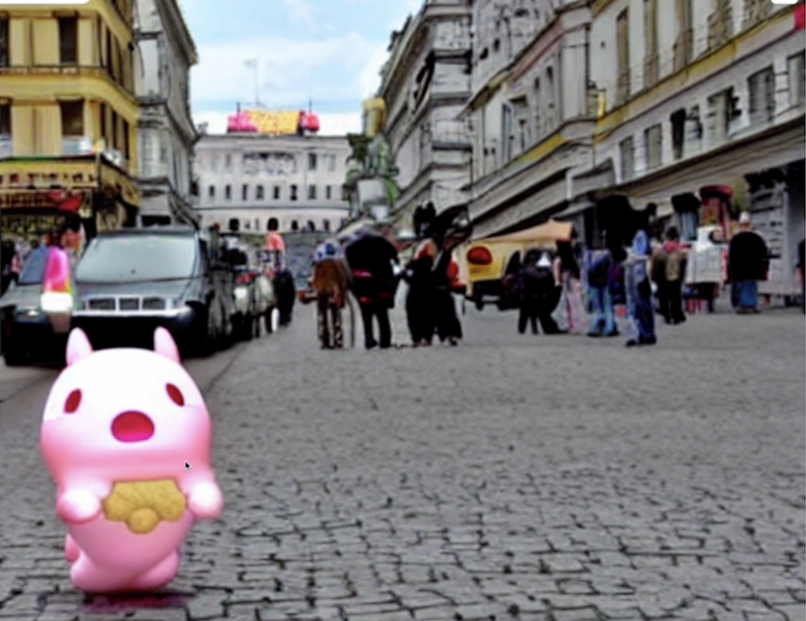

In [40]:
from PIL import Image
raw_image = Image.open('gradio_tamagochi_vienna.png')
raw_image.resize((806, 621))

In [28]:
depth_estimator = pipeline(task="depth-estimation",
                        model="Intel/dpt-hybrid-midas")
output = depth_estimator(raw_image)
prediction = torch.nn.functional.interpolate(
    output["predicted_depth"].unsqueeze(1),
    size=raw_image.size[::-1],
    mode="bicubic",
    align_corners=False,
)

"""you can print the following parameters to check the output
output                                               # it is a tensor
output["predicted_depth"].shape                       #torch.Size([1, 384, 384])
output["predicted_depth"].unsqueeze(1).shape            #torch.Size([1, 1, 384, 384]) 
prediction.shape
raw_image.size[::-1],
prediction
"""

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


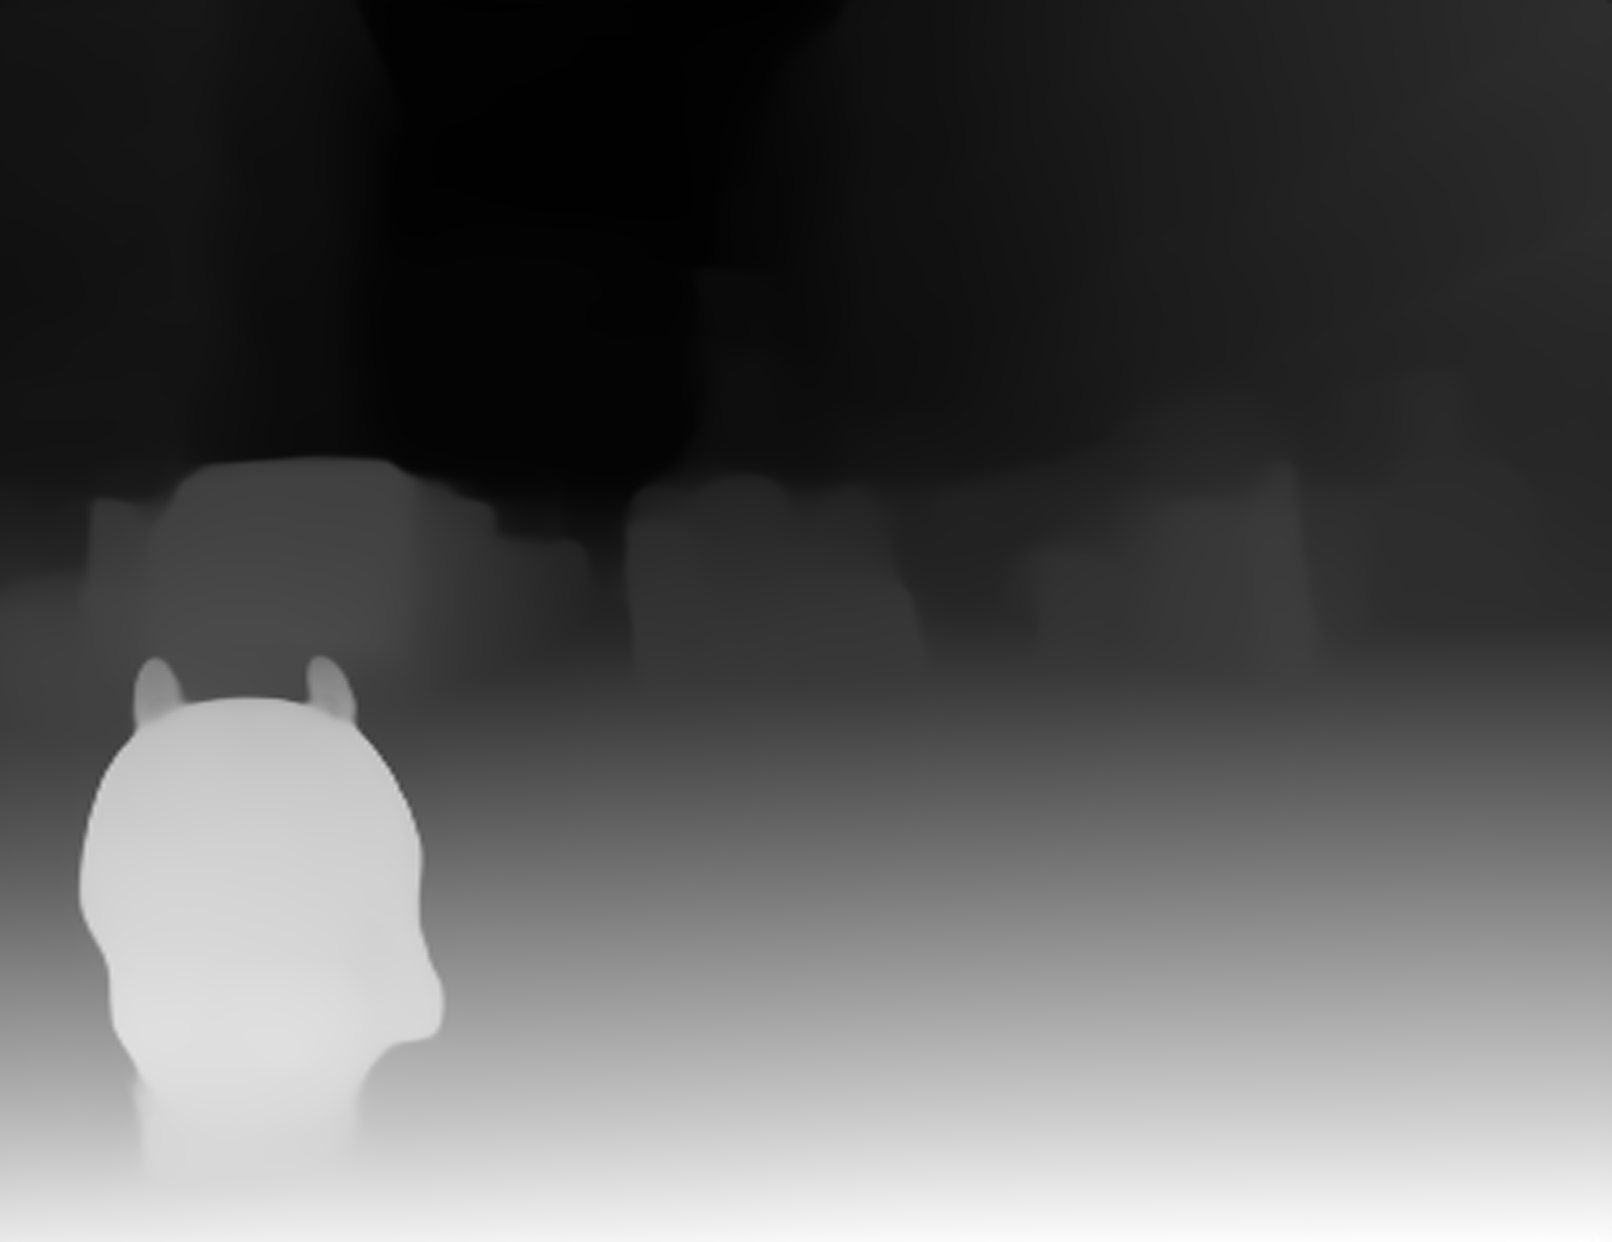

In [36]:
import numpy as np 
output = prediction.squeeze().numpy()
formatted = (output * 255 / np.max(output)).astype("uint8")
depth = Image.fromarray(formatted)
depth

In [37]:
def launch(input_image):
    out = depth_estimator(input_image)

    # resize the prediction
    prediction = torch.nn.functional.interpolate(
        out["predicted_depth"].unsqueeze(1),
        size=input_image.size[::-1],
        mode="bicubic",
        align_corners=False,
    )

    # normalize the prediction
    output = prediction.squeeze().numpy()
    formatted = (output * 255 / np.max(output)).astype("uint8")
    depth = Image.fromarray(formatted)
    return depth

In [43]:
iface.close()

In [46]:
iface = gr.Interface(launch, 
                     inputs=gr.Image(type='pil'), 
                     outputs=gr.Image(type='pil'))
iface.launch(share=True, server_port= 7861)#int(os.environ['PORT1']))

Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://7dcbf49ecf19f1c981.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


OSError: Cannot find empty port in range: 8080-8080. You can specify a different port by setting the GRADIO_SERVER_PORT environment variable or passing the `server_port` parameter to `launch()`.